
# 3.1- Churn Prediction Project

#The project aims to identify customers that are likely to churn or stoping to use a service. Each customer has a score associated with the probability of churning. Considering this data, the company would send an email with discounts or other promotions to avoid churning.

#The ML strategy applied to approach this problem is binary classification, which for one instance can be expressed as: g(Xi) = yi. where Xi is the feature vector/characteristics information describing the ith customer 

#In the formula, yi is the model's prediction and belongs to {0,1}, being 0 the negative value or no churning, and 1 the positive value or churning. The output corresponds to the likelihood of churning.

#In brief, the main idea behind this project is to build a model with historical data from customers and assign a score of the likelihood of churning.

# 3.2- Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\emman\\Desktop\\ML-Zoomcamp  projects\\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#use transpose to see all columns in a dataframe:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


#Make Column names and values look uniform

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [6]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [7]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [8]:
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [9]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


#Check if all the columns read correctly.

In [10]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [11]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')       #change this column from object to numeric

In [12]:
df.isnull().sum()               #check missing numbers in the dataframe

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [13]:
df['totalcharges'] = df['totalcharges'].fillna(0)        #do not always fill with zero

In [14]:
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

#Check if the Churn Variable needs any preparation: if any, change the variables to 0 or 1 ie negative or positive.

In [15]:
df['churn']

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In [16]:
(df['churn'] == 'yes').astype('int').head()         #use astype

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int32

#new_churn = pd.get_dummies(df['churn'], drop_first=True)
#new_churn                    you can use this method too to change churn column from object to numeric

In [17]:
df['churn'] = (df['churn'] == 'yes').astype(int)

# 3.3- Setting Up The Validation Framework

#Perform the train(60%) /validation(20%) /test(20%) Split with Scikit-Learn

In [18]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#This above method was used for my previous class for reference.

In [19]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)   #test_size=0.2 is the 20% test_data

In [20]:
len(df_full_train), len(df_test)

(5634, 1409)

In [21]:
# get the train_test and validation_test: 20% of df_val of the 80% of df_train = 0.25 == 20/80 == 1/4

df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [22]:
len(df_train), len(df_val), len(df_test)          #the actual lengths of each split dataframes

(4225, 1409, 1409)

In [23]:
df_train = df_train.reset_index(drop=True)                                     #shuffle the indexes of each dataframe:
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [24]:
# df_train.head(), df_val.head(), df_test.head()          #call the first 5 columns with this codes

In [25]:
y_train = df_train['churn'].values                    # target values for each dataframes in nump array
y_val = df_val['churn'].values
y_test = df_test['churn'].values

In [26]:
del df_train['churn']             # df_train.drop('churn', axis=1)
del df_val['churn']               # df_val.drop('churn', axis=1)
del df_test['churn']              # df_test.drop('churn', axis=1)

# 3.4- Exploratory Data Analysis (EDA)

#The EDA for this project consisted of:

#Checking missing values

#Looking at the distribution of the target variable (churn)

#Looking at numerical and categorical variables

In [27]:
# we use the df_full_train for EDA

df_full_train = df_full_train.reset_index(drop=True)

In [28]:
df_full_train.isnull().sum()         # no missing values

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [29]:
df_full_train['churn'].value_counts(), df_full_train['churn'].value_counts(normalize=True)    #normalize gives percentage

(0    4113
 1    1521
 Name: churn, dtype: int64,
 0    0.730032
 1    0.269968
 Name: churn, dtype: float64)

In [30]:
global_churn_rate = df_full_train['churn'].mean()       #Churn Rate. Normalize above gives the full % of churn and not churn
round(global_churn_rate, 2)                           #Mathematically, Churn Rate = 1/n * sum of all target variables      

0.27

In [31]:
df_full_train.dtypes         # get numerical and categorical variables from here

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

In [32]:
numeral_variables = ['tenure', 'monthlycharges', 'totalcharges']

In [33]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [34]:
categorical_variables = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines',
                          'internetservice','onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
                         'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling','paymentmethod']

In [35]:
df_full_train[categorical_variables].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# 3.5- Feature Importance: Churn Rate and Risk Ratio

#Churn Rate

In [36]:
churn_female = df_full_train[df_full_train['gender'] == 'female']['churn'].mean()         #females to churn
churn_female

0.27682403433476394

In [37]:
global_churn_rate - churn_female              #difference between global_churn and female gender

-0.006855983216553063

In [38]:
churn_male = df_full_train[df_full_train['gender'] == 'male']['churn'].mean()            #males to churn
churn_male

0.2632135306553911

In [39]:
global_churn_rate - churn_male              #difference between global_churn and male gender

0.006754520462819769

In [40]:
df_full_train['partner'].value_counts()       # to get details of churn partners

no     2932
yes    2702
Name: partner, dtype: int64

In [41]:
churn_no_partner = df_full_train[df_full_train['partner'] == 'no']['churn'].mean()
churn_no_partner

0.3298090040927694

In [42]:
global_churn_rate - churn_no_partner          #difference between global_churn and people with no partners

-0.05984095297455855

In [43]:
churn_yes_partner = df_full_train[df_full_train['partner'] == 'yes']['churn'].mean()
churn_yes_partner

0.20503330866025166

In [44]:
global_churn_rate - churn_yes_partner        #difference between global_churn and people with partners

0.06493474245795922

#NB: Since there is much difference for partner variable than gender, partner is more important feature than gender. 
#Global_churn - Group_churn > 0: less likely to churn
#Global_churn - Group_churn < 0: more likely to churn

#Risk Ratio = Group_churn / Global_churn

In [45]:
churn_no_partner / global_churn_rate         #risk ratio > 1 is more likely to churn

1.2216593879412643

In [46]:
churn_yes_partner / global_churn_rate        #risk ratio < 1 is less likely to churn

0.7594724924338315

#get the feature, risk ratio and churn ratio in one step as a dataframe: this can be done for all categorical_variables

In [47]:
df_group = df_full_train.groupby('gender')['churn'].agg(['mean','count'])
df_group

,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


In [48]:
df_group['diff'] = df_group['mean'] - global_churn_rate
df_group['risk'] = df_group['mean'] / global_churn_rate
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [49]:
from IPython.display import display

In [50]:
for c in categorical_variables:
    print(c)
    df_group = df_full_train.groupby(c)['churn'].agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


In [51]:
for c in categorical_variables:
    df_group = df_full_train.groupby(c)['churn'].agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    print('\n')
    print(df_group)



            mean  count      diff      risk
gender                                     
female  0.276824   2796  0.006856  1.025396
male    0.263214   2838 -0.006755  0.974980


                   mean  count      diff      risk
seniorcitizen                                     
0              0.242270   4722 -0.027698  0.897403
1              0.413377    912  0.143409  1.531208


             mean  count      diff      risk
partner                                     
no       0.329809   2932  0.059841  1.221659
yes      0.205033   2702 -0.064935  0.759472


                mean  count      diff      risk
dependents                                     
no          0.313760   3968  0.043792  1.162212
yes         0.165666   1666 -0.104302  0.613651


                  mean  count      diff      risk
phoneservice                                     
no            0.241316    547 -0.028652  0.893870
yes           0.273049   5087  0.003081  1.011412


                      mean  count   

# 3.6- Feature Importance: Mutual Information

#This is a way to measure the importance or relationship of a categorical variable compared to other categorical variables

In [52]:
from sklearn.metrics import mutual_info_score

In [53]:
mutual_info_score(df_full_train['churn'], df_full_train['contract'])

0.0983203874041556

In [54]:
mutual_info_score(df_full_train['churn'], df_full_train['gender'])

0.0001174846211139946

In [55]:
mutual_info_score(df_full_train['churn'], df_full_train['partner'])

0.009967689095399745

#NB: the above mutual_info_score shows contract feature more important info than gender feature when considering churning. Also, partner feature is more important than gender but less importatnt than contract. This can be done for all features comparison

In [56]:
#apply above to all categorical columns:

def mutual_info_churn_score(series):
    return mutual_info_score(df_full_train['churn'], series)

In [57]:
mi = df_full_train[categorical_variables].apply(mutual_info_churn_score)
mi

gender              0.000117
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
phoneservice        0.000229
multiplelines       0.000857
internetservice     0.055868
onlinesecurity      0.063085
onlinebackup        0.046923
deviceprotection    0.043453
techsupport         0.061032
streamingtv         0.031853
streamingmovies     0.031581
contract            0.098320
paperlessbilling    0.017589
paymentmethod       0.043210
dtype: float64

#df_full_train[categorical_variables].apply(lambda categorical_variables : mutual_info_score(df_full_train['churn'], categorical_variables))

#same as the above function

In [58]:
#sort the features in ascending order to know from the most important to least important

mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

# 3.7- Feature Importance: Correlation

#Correlation measures the importance between mutual variables(columns). Correlation coefficient measures the degree of dependency between two variables. This value is negative if one variable grows while the other decreases, and it is positive if both variables increase. Depending on its size, the dependency between both variables could be low, moderate, or strong. It allows measuring the importance of numerical variables.

#If r is correlation coefficient, then the correlation between two variables is:

#LOW when r is between [0, -0.2) or [0, 0.2)
#MEDIUM when r is between [-0.2, -0.5) or [0.2, 0.5)
#STRONG when r is between [-0.5, -1.0] or [0.5, 1.0]
#Positive Correlation vs. Negative Correlation

#When r is positive, an increase in x will increase y.
#When r is negative, an increase in x will decrease y.
#When r is 0, a change in x does not affect y.

In [59]:
#correlate numerical values with churn: longer tenure/totalcharges bring less churn. Higher monthlycharges bring more churn

df_full_train[numeral_variables].corrwith(df_full_train['churn'])

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [60]:
df_full_train[numeral_variables].corrwith(df_full_train['churn']).abs()     #to know most important numerical feature

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

#for confirmation of tenure of less than 2-months and 12-months

In [61]:
df_full_train[df_full_train['tenure'] <= 2]['churn'].mean()                #59% chance of churn rate

0.5953420669577875

In [62]:
df_full_train[(df_full_train['tenure'] > 2) & (df_full_train['tenure'] <= 12)]['churn'].mean()  #39% chance of churn rate

0.3994413407821229

In [63]:
df_full_train[df_full_train['tenure'] > 12]['churn'].mean()               #17% of churn rate

0.17634908339788277

#confirmation of monthly charges for 20dollars and 50 dollars

In [64]:
df_full_train[df_full_train['monthlycharges'] <= 20]['churn'].mean()       # 8% churn rate

0.08795411089866156

In [65]:
df_full_train[(df_full_train['monthlycharges'] > 20) & (df_full_train['monthlycharges'] <= 50)]['churn'].mean()   #18% CR

0.18340943683409436

In [66]:
df_full_train[df_full_train['monthlycharges'] > 50]['churn'].mean()               #32% churn rate

0.32499341585462205

# 3.8- One-hot Encoding

#df_full_train['gender'] = (df_full_train['gender'] == 'female').astype(int).head()

#df_gender = pd.get_dummies(df_full_train['gender'])          

#Any of this can be used for one-hot encoding which is different from class lecture.

In [67]:
from sklearn.feature_extraction import DictVectorizer

In [68]:
#using gender and contract as examples:

dicts = df_train[['gender', 'contract']].iloc[:100].to_dict(orient='records')
dicts

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'two_year'},
 {

In [69]:
dv = DictVectorizer(sparse=False)            #instantiate the Dictvetorizer estimator. use sparse to remove matix with zeros

In [70]:
dv.fit(dicts)                          #fit the converted dicts into the DictVectorizer

DictVectorizer(sparse=False)

In [71]:
dv.get_feature_names()

C:\Users\emman\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male']

In [72]:
dv.transform(dicts)               #Sparse matrix is a matrix with many zeros. 

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0.

#From the above, feature names corresponds to transformed columns. 1-3 column is for contract, 4-5 columns is for gender. DictVectorizer does not change numerical variables. It changes just categorical variables

#Apply DictVectorizer to all categorical and numerical variables

In [73]:
train_dicts = df_train[categorical_variables + numeral_variables].to_dict(orient='records')
train_dicts                        #call the first changed records of the training dataset

[{'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'two_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'electronic_check',
  'tenure': 72,
  'monthlycharges': 115.5,
  'totalcharges': 8425.15},
 {'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'no',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'no',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'month-to-month',
  'paperlessbilling': 'yes',
  'paymentmethod': 'electronic_check',
  'tenure': 10,
  'monthlycharges': 95.25,
  'totalcharges': 1021.55},
 {'gender

In [74]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

In [75]:
X_train = dv.fit_transform(train_dicts)             #the feature matrix for the training dataset
X_train

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]])

In [76]:
dv.get_feature_names()

C:\Users\emman\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [77]:
# list(dv.fit_transform(train_dicts[:5])[0])      selected list of the fit&transformed changed training data to dictionary

In [78]:
val_dicts = df_val[categorical_variables + numeral_variables].to_dict(orient='records')
val_dicts                        #call the first changed records of the validation dataset

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'no',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'two_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'credit_card_(automatic)',
  'tenure': 71,
  'monthlycharges': 70.85,
  'totalcharges': 4973.4},
 {'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'month-to-month',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  

In [79]:
X_val = dv.transform(val_dicts)            #use only transform object on validation dataset. fit is for training
X_val

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 1.0000e+00, 7.1000e+01,
        4.9734e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0750e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0350e+01],
       ...,
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 1.8000e+01,
        1.0581e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        9.3300e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 3.0000e+00,
        2.9285e+02]])

In [80]:
# list(dv.fit_transform(val_dicts[:5])[0])        #selected list of the fit&transformed changed training data to dictionary

# 3.9- Logistic Regression

#logistic regression formula is similar to linear regression: g(Xi) == sigmoid(W0 + W.dot(Xi) == yi, where yi is the target and gives binary output(0 or 1), g is the model,Xi is the feature. Logistic regression is represented by a sigmoid curve starting at 0 and ending at 1.

#LogReg = 1/(1 + exp(-z)). Logistic regression is a classification type of supervised learning.

In [81]:
#to plot the sigmoid curve: z is the input of sigmoid

def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [82]:
z = np.linspace(-7, 7, 51)
z

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

In [83]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

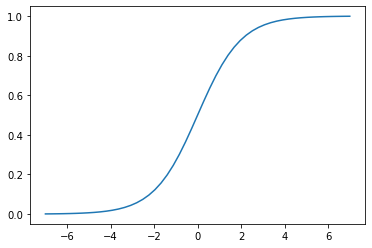

In [84]:
plt.plot(z, sigmoid(z))            #confirmation of the sigmoid curve at -ve part 0 and +ve part 1

In [85]:
def linear_regression(xi):                   #linear regression function formula
    result = w0
    
    for j in range(len(xi)):
        result = result + w[j] * xi[j]
        
    return result

In [86]:
def logistic_regression(xi):                   #logistic regression function formula. Both are called linear models
    score = w0
    
    for j in range(len(xi)):
        score = score + w[j] * xi[j]
        
    result = sigmoid(score)
    return result

# 3.10- Training Logistic Regression with Scikit-Learn

#Train logistics regression with scikit learn, apply it to validation set and calculate the accuracy

In [87]:
from sklearn.linear_model import LogisticRegression           #import Ridge which is regularize linear regression

In [88]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [89]:
# to get the first element weights(coefficients): @-dimensional array

model.coef_.round(3)[0]

array([ 0.474, -0.175, -0.407, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.123, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [90]:
#get the bias first element

model.intercept_[0]

-0.10907153920556581

In [91]:
#hard predictions with validation dataset: this is not necessary for predictions.

model.predict(X_val)

array([0, 0, 0, ..., 0, 1, 1])

In [92]:
#soft predictions with validation dataset: we are interested in the second column probability

y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.00899922, 0.20435726, 0.21203736, ..., 0.13638714, 0.79969074,
       0.83733007])

In [93]:
#set a threshold at >= 0.5 for those who will churn and to be sent emails

churn_decision = (y_pred >= 0.5)
churn_decision

array([False, False, False, ..., False,  True,  True])

In [94]:
#get the customerid data of churned customers from the validation set

df_val[churn_decision]['customerid']

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

In [95]:
#compare between y_val and churn decision:

y_val, churn_decision.astype(int)

(array([0, 0, 0, ..., 0, 0, 1]), array([0, 0, 0, ..., 0, 1, 1]))

In [96]:
#test the accurary of our model:

(y_val == churn_decision).mean()

0.6458481192334989

In [97]:
#combine all into a dataframe:
df_pred = pd.DataFrame({'probability':y_pred, 'predictions':churn_decision, 'actual':y_val,
                        'correct':(y_val==churn_decision)})

In [98]:
df_pred

,probability,predictions,actual,correct
0,0.008999,False,0,True
1,0.204357,False,0,True
2,0.212037,False,0,True
3,0.542996,True,1,True
4,0.213615,False,0,True
...,...,...,...,...
1404,0.313509,False,1,False
1405,0.039358,False,0,True
1406,0.136387,False,0,True
1407,0.799691,True,0,False


In [99]:
#get the accuracy from the correct column: it shows the model is 64% correct.
df_pred['correct'].mean()

0.6458481192334989

# 3.11- Model Interpretation

#Look at the coefficients and train a smaller moder with fewer features 

In [100]:
#join the feature names with the coefficients: list or dict can be used with zip

dict(zip(dv.get_feature_names(), model.coef_.round(3)[0]))

C:\Users\emman\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.474,
 'contract=one_year': -0.175,
 'contract=two_year': -0.407,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.316,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.123,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

In [101]:
#train a small model with 3 features:

small = ['contract', 'tenure', 'monthlycharges']
dict_train_small = df_train[small].to_dict(orient='records')
dict_val_small = df_val[small].to_dict(orient='records')

In [102]:
from sklearn.feature_extraction import DictVectorizer

In [103]:
dv_small = DictVectorizer(sparse=True)

In [104]:
dv_small.fit(dict_train_small)

DictVectorizer()

In [105]:
dv_small.get_feature_names()         #use feature names out 

C:\Users\emman\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [106]:
X_train_small = dv_small.transform(dict_train_small)

In [107]:
model_small = LogisticRegression()           #instantiate the model

In [108]:
model_small.fit(X_train_small,y_train)                 #fit with X_train_small and y_train

LogisticRegression()

In [109]:
w0 = model_small.intercept_[0].round(2)                   #bias weight w0
w0

-2.48

In [110]:
w = model_small.coef_[0].round(3)                           #weights
w

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [111]:
dict(zip(dv_small.get_feature_names(), w))

C:\Users\emman\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

#for example, if we had a customer with month-to-month contract, with $50 as monthly charges and 5months tenure, we can calculate the sigmoid. Month-to-month has 1 and other contracts are zero. sigmoid(_) means take the last output and input into sigmoid function

In [112]:
sigmoid(-2.48 + (1 * 0.97) + (0 * -0.025) + (0 * -0.949) + (50 * 0.027) + (5 * -0.036))

0.4158094770645927

In [113]:
#a customer with one month contract and pays $60 monthly and 1-month tenure

sigmoid(-2.48 + (1 * 0.97) + (0 * -0.025) + (0 * -0.949) + (60 * 0.027) + (1 * -0.036))

0.5184915624537035

In [114]:
#a customer with 2-year contract and pays $30 monthly and 24-months tenure

sigmoid(-2.48 + (0 * 0.97) + (0 * -0.025) + (1 * -0.949) + (30 * 0.027) + (24 * -0.036))

0.029799821969332365

# 3.12- Using the Model

#we use the same process for full train dataset and test dataset

In [115]:
dicts_full_train = df_full_train[categorical_variables + numeral_variables].to_dict(orient = 'records')

In [116]:
dv = DictVectorizer(sparse=False)

In [117]:
X_full_train = dv.fit_transform(dicts_full_train) 

In [118]:
y_full_train = df_full_train['churn'].values

In [119]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [120]:
#apply the same process to our test data:

dicts_test = df_test[categorical_variables + numeral_variables].to_dict(orient = 'records')

In [121]:
X_test = dv.transform(dicts_test) 

In [122]:
y_pred = model.predict_proba(X_test)[:,1]             #get the 2nd column which is important

In [123]:
churn_decision = (y_pred >= 0.5)                 #a decision of 0.5 and above as churn

In [124]:
(churn_decision == y_test).mean()                      #check accuracy of our model

0.815471965933286

In [125]:
#using our model on a random customer

customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [126]:
X_customer = dv.transform(customer)
X_customer

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 9.39500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 3.20000e+01, 2.86145e+03]])

In [127]:
model.predict_proba(X_customer)[0,1]    #this shows customer 10 has 40% chance of churning(not churn)

0.40568109779885553

In [128]:
y_test[10]                         #actual churn value shows customer 10 will not churn

0

In [129]:
#using our model on the last customer

last_customer = dicts_test[-1]
last_customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [130]:
X_last_customer = dv.transform(last_customer)
X_last_customer[0].round(2)

array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0420e+02, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 1.7000e+01, 1.7435e+03])

In [131]:
model.predict_proba(X_last_customer)[0,1]          #last customer will churn which is more than 50%

0.5968852088415657

In [132]:
y_test[-1]                              #actual churn value shows last customer will churn

1

In [134]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv -O AB_NYC_2019.csv
--2021-09-27 17:03:29--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘AB_NYC_2019.csv’

AB_NYC_2019.csv     100%[===================>]   6.75M  7.92MB/s    in 0.9s    

2021-09-27 17:03:30 (7.92 MB/s) - ‘AB_NYC_2019.csv’ saved [7077973/7077973]

Data preparation
usecols = [
    'room_type', 'neighbourhood_group',
    'latitude', 'longitude', 'price','minimum_nights',
    'number_of_reviews', 'reviews_per_month', 
    'calculated_host_listings_count', 'availability_365'
]

df = pd.read_csv('AB_NYC_2019.csv', usecols=usecols)
df['reviews_per_month'] = df.reviews_per_month.fillna(0)
df['price'] = df['price'] >= 152
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

del df_train['price']
del df_val['price']
del df_test['price']
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
cat = ['neighbourhood_group', 'room_type']

num = [
    'latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
    'reviews_per_month', 'calculated_host_listings_count',
    'availability_365'
]
Training the model
You get a convergence warning:

train_dict = df_train[cat + num].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

model = LogisticRegression(solver='lbfgs', C=1.0)
model.fit(X_train, y_train)
/home/alexey/.pyenv/versions/3.8.11/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
LogisticRegression()
We can fix this model by using a scaler. You can read more about scalers here.

Also, we'll show you how to use OneHotEncoding instead of DictVectorizer

Feature scaling + OHE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
First, we prepare the numerical variables. We'll use the scaler for that and write the results to X_train_num:

X_train_num = df_train[num].values

scaler = StandardScaler()
#scaler = MinMaxScaler()

X_train_num = scaler.fit_transform(X_train_num)
The scaler scales the numerical features. Compare the un-scaled version of latitude with the scaled one:

df_train.latitude.values
array([40.7276 , 40.70847, 40.83149, ..., 40.79994, 40.69585, 40.64438])
X_train_num[:, 0]
array([-0.02524398, -0.37616878,  1.88053632, ...,  1.3017764 ,
       -0.60767275, -1.5518494 ])
Now let's process categorical features using OneHotEncoding. We'll write the results to X_train_cat:

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_cat = ohe.fit_transform(df_train[cat].values)
ohe.get_feature_names()
array(['x0_Bronx', 'x0_Brooklyn', 'x0_Manhattan', 'x0_Queens',
       'x0_Staten Island', 'x1_Entire home/apt', 'x1_Private room',
       'x1_Shared room'], dtype=object)
Now we need to combine two matrices into one - X_train:

X_train = np.column_stack([X_train_num, X_train_cat])
And now let's train the model:

model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_train, y_train)
LogisticRegression(random_state=42)
We can check it's accuracy:

X_val_num = df_val[num].values
X_val_num = scaler.transform(X_val_num)

X_val_cat = ohe.transform(df_val[cat].values)

X_val = np.column_stack([X_val_num, X_val_cat])
y_pred = model.predict_proba(X_val)[:, 1]
accuracy_score(y_val, y_pred >= 0.5)
0.7976275692811126
It's a little bit better than the version without scaled features.

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 74)

# 4.1&2- Accuracy and Dummy Model

#Accurcy measures the fraction of correct predictions. Specifically, it is the number of correct predictions divided by the total number of predictions.

#We can change the decision threshold, it should not be always 0.5. But, in this particular problem, the best decision cutoff, associated with the hightest accuracy (80%), was indeed 0.5.

#Note that if we build a dummy model in which the decision cutoff is 1, so the algorithm predicts that no clients will churn, the accuracy would be 73%. Thus, we can see that the improvement of the original model with respect to the dummy model is not as high as we would expect.

#Therefore, in this problem accuracy can not tell us how good is the model because the dataset is unbalanced, which means that there are more instances from one category than the other. This is also known as class imbalance.

In [135]:
len(y_val)

1409

In [136]:
(y_val == churn_decision).sum()

1149

#Mathemativcally, Accuracy = number of correct predictions / total number of val. customers

In [137]:
1149 / 1409              #(y_val == churn_decision).sum() / len(y_val) = appro 80%. same as (y_val == churn_decision).mean()

0.815471965933286

#We considered threshold of 0.5 for churn decision. Let's try multiple threshold to find accuracy:

In [138]:
threshold = np.linspace(0,1,21)

scores = []

for t in threshold:
    churn_decision = y_pred >= t
    score = (y_val == churn_decision).mean()
    print('%.2f, %.3f' % (t, score))
    scores.append(score)

0.00, 0.247
0.05, 0.480
0.10, 0.603
0.15, 0.674
0.20, 0.707
0.25, 0.746
0.30, 0.771
0.35, 0.778
0.40, 0.791
0.45, 0.803
0.50, 0.815
0.55, 0.819
0.60, 0.814
0.65, 0.806
0.70, 0.800
0.75, 0.781
0.80, 0.766
0.85, 0.754
0.90, 0.753
0.95, 0.753
1.00, 0.753


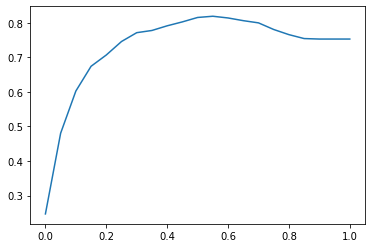

In [139]:
plt.plot(threshold, scores)

In [140]:
#using sklearn for accuracy:

from sklearn.metrics import accuracy_score

In [141]:
accuracy_score(y_val, y_pred >= 0.5)

0.815471965933286

In [142]:
threshold = np.linspace(0,1,21)

scores = []

for t in threshold:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f, %.3f' % (t, score))
    scores.append(score)

0.00, 0.247
0.05, 0.480
0.10, 0.603
0.15, 0.674
0.20, 0.707
0.25, 0.746
0.30, 0.771
0.35, 0.778
0.40, 0.791
0.45, 0.803
0.50, 0.815
0.55, 0.819
0.60, 0.814
0.65, 0.806
0.70, 0.800
0.75, 0.781
0.80, 0.766
0.85, 0.754
0.90, 0.753
0.95, 0.753
1.00, 0.753


In [143]:
#if our threshold for churning is 1.0 and above, it means no customer will churn. Confirm this below:

y_pred >= 1.0

array([False, False, False, ..., False, False, False])

In [144]:
from collections import Counter                            #to count in python.

Counter(y_pred >= 1.0)

Counter({False: 1409})

In [145]:
Counter(y_val)                    # to count number of people that will churn and not churn.

Counter({0: 1061, 1: 348})

In [146]:
y_val.mean(), 1 - y_val.mean()                    # % of people to churn is approximately 25% and not churn is 75%

(0.24698367636621718, 0.7530163236337828)

#if we create a dummy model where we predict everyone is not churning(y_pred >= 1 and 75% accuracy), it is 6% less than the overall accuracy of the model, from the calculations above, it still shows 25% will churn after from our dummy model. This means that there is a class imbalance: ratio of % not churning to % churning = (3:1). Accuracy is for class imbalance and not the best metric. 

# 4.3- Confusion Table

#Confusion table is a way of measuring different types of errors and correct decisions that binary classifiers can make. Considering this information, it is possible to evaluate the quality of the model by different strategies.

#When comes to a prediction of an LR model, each falls into one of four different categories:

#Prediction is that the customer WILL churn. This is known as the Positive class
#And Customer actually churned - Known as a True Positive (TP), 
#But Customer actually did not churn - Knwon as a False Positive (FP)
#Prediction is that the customer WILL NOT churn' - This is known as the Negative class
#Customer did not churn - True Negative (TN)
#Customer churned - False Negative (FN)
#'Confusion Table' is a way to summarize the above results in a tabular format, as shown below:

#Actual ⬇️ Predictions➡️	Negative	Positive
#Negative	                      TN	FP
#Postive	                      FN	TP
#The accuracy corresponds to the sum of TN and TP divided by the total of observations.

In [147]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [148]:
t = 0.5
predict_positive = (y_pred >= 0.5)
predict_negative = (y_pred < 0.5)

In [149]:
TP = (predict_positive & actual_positive).sum()        #true positive and true negative
TN = (predict_negative & actual_negative).sum()

In [150]:
FP = (predict_positive & actual_negative).sum()        #false positive and false negative.
FN = (predict_negative & actual_positive).sum()

In [151]:
FP, FN, TP, TN

(112, 148, 200, 949)

In [152]:
confusion_matrix = np.array([[949,112],[148,200]])          # np.array([[TN, FP],[FN,TP]])
confusion_matrix

array([[949, 112],
       [148, 200]])

In [153]:
#to normalize into percentage:

norm = confusion_matrix / confusion_matrix.sum()
norm.round(2)

array([[0.67, 0.08],
       [0.11, 0.14]])

#note: 67%-TN, 8%-FP, 11%-FN, 14%-TP. Accuracy = 67% + 14% = 81% which is equal to the accuracy above. 

In [154]:
from sklearn.metrics import classification_report, confusion_matrix    #using sklearn

In [155]:
print(classification_report(y_val, y_pred >= 0.5))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1061
           1       0.64      0.57      0.61       348

    accuracy                           0.82      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.81      0.82      0.81      1409



In [156]:
(confusion_matrix(y_val, y_pred >= 0.5))

array([[949, 112],
       [148, 200]], dtype=int64)

# 4.4- Precision and Recall

#Precision is a metric that tells us a fraction of correct positive predictions. It takes into account only the positive class (TP and FP - second column of the confusion matrix).

#Mathematically: Precision = TP / (TP + FP)

#Recall measures the fraction of correctly identified positive instances. It considers parts of the positive and negative classes (TP and FN - second row of confusion table).

#Mathematically: Recall = TP / (TP + FN)

#In this problem, the precision and recall values were 67% and 54% respectively. So, these measures reflect some errors of our model that accuracy did not notice due to the class imbalance.

In [157]:
P = TP / (TP + FP)
P

0.6410256410256411

In [158]:
(TP + FP), TP        #send discount to 312 people and 200(36%) people will still churn. 

(312, 200)

In [159]:
R = TP / (TP + FN)
R

0.5747126436781609

In [160]:
(TP + FN), TP         #send discount to 348 people and 200(43%) people failed to be identified.

(348, 200)

#Precision and Recall above were below 81% accuracy, which means that our model is misleading to be good. This accuracy is for class imbalance datset

# 4.5- ROC Curves : False Positve Rate (FRP), True Positive Rate (TRP)

#ROC - Receiver operating characteristics: this is a way of describing binary classification models. It was used in second world war for evaluating the strength of radio detectors, eg a radar was used to check if there was an incoming plane. Plane was either y = 1 or 0 and X, the signals from the radar. ROC works with so may thresholds. 

#FPR is the fraction of false positives (FP) divided by the total number of negatives (FP and TN - the first row of confusion matrix), and we want to minimize it.

#False Positive Rate(FPR) = FP / (TN + FP)

#TPR or Recall is the fraction of true positives (TP) divided by the total number of positives (FN and TP - second row of confusion table), and we want to maximize this metric.

#TRP/Recall = TP / (TP + FN)

In [161]:
FPR = FP / (TN + FP)
FPR

0.1055607917059378

In [162]:
TRP = TP / (TP + FN)
TRP

0.5747126436781609

In [163]:
R

0.5747126436781609

In [164]:
# Roc curve works with so may thresholds: we convert it into a dataframe

scores = []
thresholds = np.linspace(0,1,101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    TP = (predict_positive & actual_positive).sum()        
    TN = (predict_negative & actual_negative).sum()
    
    FP = (predict_positive & actual_negative).sum()        
    FN = (predict_negative & actual_positive).sum()
    
    scores.append((t, TP, FP, FN, TN))
    columns = ['thresholds','TP','FP','FN','TN']
    df_scores = pd.DataFrame(scores, columns=columns)

In [165]:
df_scores.head()

,thresholds,TP,FP,FN,TN
0,0.00,348,1061,0,0
1,0.01,347,948,1,113
2,0.02,344,870,4,191
3,0.03,344,808,4,253
4,0.04,344,773,4,288


In [166]:
df_scores[::10]                 #from first index to last index with every 10th  

,thresholds,TP,FP,FN,TN
0,0.0,348,1061,0,0
10,0.1,335,547,13,514
20,0.2,300,365,48,696
30,0.3,278,252,70,809
40,0.4,239,185,109,876
50,0.5,200,112,148,949
60,0.6,150,64,198,997
70,0.7,86,20,262,1041
80,0.8,18,0,330,1061
90,0.9,0,0,348,1061


In [167]:
df_scores['TPR'] = df_scores['TP'] / (df_scores['TP'] + df_scores['FN'])
df_scores['FPR'] = df_scores['FP'] / (df_scores['FP'] + df_scores['TN'])
df_scores[::10]

,thresholds,TP,FP,FN,TN,TPR,FPR
0,0.0,348,1061,0,0,1.000000,1.000000
10,0.1,335,547,13,514,0.962644,0.515551
20,0.2,300,365,48,696,0.862069,0.344015
30,0.3,278,252,70,809,0.798851,0.237512
40,0.4,239,185,109,876,0.686782,0.174364
50,0.5,200,112,148,949,0.574713,0.105561
60,0.6,150,64,198,997,0.431034,0.060320
70,0.7,86,20,262,1041,0.247126,0.018850
80,0.8,18,0,330,1061,0.051724,0.000000
90,0.9,0,0,348,1061,0.000000,0.000000


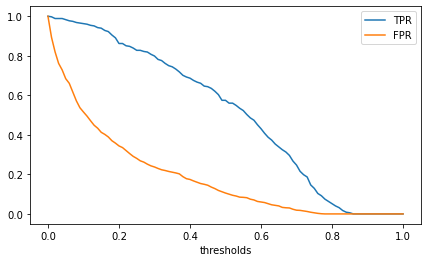

In [168]:
plt.figure(figsize=(7,4))
plt.plot(df_scores['thresholds'], df_scores['TPR'], label = 'TPR')
plt.plot(df_scores['thresholds'], df_scores['FPR'], label = 'FPR')
plt.xlabel('thresholds')
plt.legend()                             #when thresholds = 0, both TPR & FPR are 1(100% correct and incorrect of churn)

#the goal is to minimize the line of FPR and maximize TPR. we get a baseline random model for comaprison, with threshold set at 0.5

# Random Model

In [169]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))
y_rand.round(3)

array([0.417, 0.72 , 0.   , ..., 0.774, 0.334, 0.089])

In [170]:
((y_rand >= 0.5) == y_val).mean()

0.49325762952448543

In [171]:
def TPR_FPR_dataframe(y_val, y_pred):
    
    scores = []
    thresholds = np.linspace(0,1,101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
    
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
    
        TP = (predict_positive & actual_positive).sum()        
        TN = (predict_negative & actual_negative).sum()
    
        FP = (predict_positive & actual_negative).sum()        
        FN = (predict_negative & actual_positive).sum()
    
        scores.append((t, TP, FP, FN, TN))
        
    columns = ['thresholds','TP','FP','FN','TN']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    df_scores['TPR'] = df_scores['TP'] / (df_scores['TP'] + df_scores['FN'])
    df_scores['FPR'] = df_scores['FP'] / (df_scores['FP'] + df_scores['TN'])
    
    return df_scores

In [172]:
df_rand = TPR_FPR_dataframe(y_val, y_rand)

In [173]:
df_rand[::10]                        #TPR and FPR decreses as threshold increases by 0.1

,thresholds,TP,FP,FN,TN,TPR,FPR
0,0.0,348,1061,0,0,1.000000,1.000000
10,0.1,307,963,41,98,0.882184,0.907634
20,0.2,271,858,77,203,0.778736,0.808671
30,0.3,237,763,111,298,0.681034,0.719133
40,0.4,212,649,136,412,0.609195,0.611687
50,0.5,177,543,171,518,0.508621,0.511781
60,0.6,137,433,211,628,0.393678,0.408106
70,0.7,102,321,246,740,0.293103,0.302545
80,0.8,67,217,281,844,0.192529,0.204524
90,0.9,35,106,313,955,0.100575,0.099906


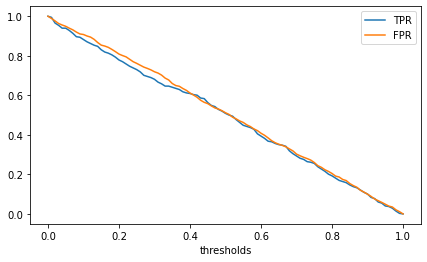

In [174]:
plt.figure(figsize=(7,4))
plt.plot(df_rand['thresholds'], df_rand['TPR'], label = 'TPR')
plt.plot(df_rand['thresholds'], df_rand['FPR'], label = 'FPR')
plt.xlabel('thresholds')
plt.legend()                             #when thresholds = 0.6, TPR=40% churn and FPR=60% not churn and vice versa

# Ideal Model

#This is a way of rearranging the score% of non-churning to churning customers in ascending order. eg. if churning rate is 72%, it means 28% churned and below 72% did not churn. they should be arranged in ascending order to give 100%. Ideal model does not exist in reality

In [175]:
num_of_neg_churn = (y_val == 0).sum()
num_of_pos_churn = (y_val == 1).sum()
num_of_neg_churn, num_of_pos_churn

(1061, 348)

In [176]:
y_ideal = np.repeat([0,1],[num_of_neg_churn,num_of_pos_churn])    #this repeats 0 for neg_churn and 1 for pos_churn
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [177]:
y_ideal_pred = np.linspace(0,1,len(y_val))
y_ideal_pred

array([0.00000000e+00, 7.10227273e-04, 1.42045455e-03, ...,
       9.98579545e-01, 9.99289773e-01, 1.00000000e+00])

In [178]:
(1 - y_val).mean()                  #% of accurate people that will not churn with threshold set at 75%

0.7530163236337828

In [179]:
((y_ideal_pred >= 0.753) == y_ideal).mean()

1.0

In [180]:
df_ideal = TPR_FPR_dataframe(y_ideal, y_ideal_pred)

In [181]:
df_ideal[::10]

,thresholds,TP,FP,FN,TN,TPR,FPR
0,0.0,348,1061,0,0,1.000000,1.000000
10,0.1,348,920,0,141,1.000000,0.867107
20,0.2,348,779,0,282,1.000000,0.734213
30,0.3,348,638,0,423,1.000000,0.601320
40,0.4,348,497,0,564,1.000000,0.468426
50,0.5,348,357,0,704,1.000000,0.336475
60,0.6,348,216,0,845,1.000000,0.203582
70,0.7,348,75,0,986,1.000000,0.070688
80,0.8,282,0,66,1061,0.810345,0.000000
90,0.9,141,0,207,1061,0.405172,0.000000


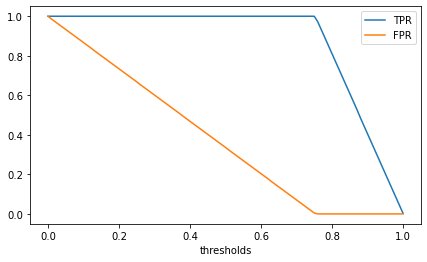

In [182]:
plt.figure(figsize=(7,4))
plt.plot(df_ideal['thresholds'], df_ideal['TPR'], label = 'TPR')
plt.plot(df_ideal['thresholds'], df_ideal['FPR'], label = 'FPR')
plt.xlabel('thresholds')
plt.legend()                             

# Putting all plots together

Text(0.5, 0, 'thresholds')

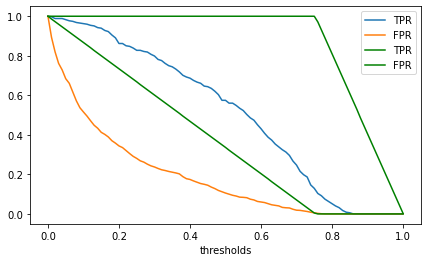

In [183]:
plt.figure(figsize=(7,4))

plt.plot(df_scores['thresholds'], df_scores['TPR'], label = 'TPR')
plt.plot(df_scores['thresholds'], df_scores['FPR'], label = 'FPR')


#plt.plot(df_rand['thresholds'], df_rand['TPR'], label = 'TPR')             #random plot tells us nothing, so we take it out
#plt.plot(df_rand['thresholds'], df_rand['FPR'], label = 'FPR')

plt.plot(df_ideal['thresholds'], df_ideal['TPR'], label = 'TPR', color = 'g')
plt.plot(df_ideal['thresholds'], df_ideal['FPR'], label = 'FPR', color = 'g')
         
plt.legend()
plt.xlabel('thresholds')

#the goal of the plot above is to make our model close to the ideal, but the distance is a bit far. To fix this, we plot TPR against FPR for each dataframe.

Text(0, 0.5, 'TPR')

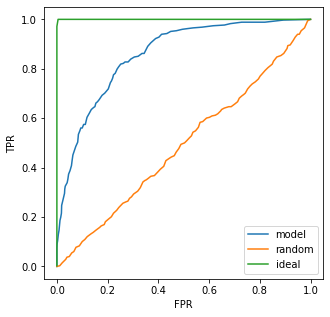

In [184]:
plt.figure(figsize=(5,5))

plt.plot(df_scores['FPR'], df_scores['TPR'], label = 'model')

plt.plot(df_rand['FPR'], df_rand['TPR'], label = 'random')

plt.plot(df_ideal['FPR'], df_ideal['TPR'], label = 'ideal')

plt.legend()

plt.xlabel('FPR')
plt.ylabel('TPR')

#to get the point where the ideal model has a 100% TPR and 0% FPR, threshold=0.753, plot a line btwn 0 and 1 with our model and take out ideal model. The plot below is a ROC cure(plot btwn TPR and FPR with a random line). our plot should move towards the ideal threshold = 0.725. any threshold on our model shows increment in TPR(churning) and FPR(predicted churn but didnt)
#A good model stays close to the ideal model, but our model was decent but was not close to the ideal. A bad model stays close to the random model. Models should not go below the random model. This is a ROC curve.

Text(0, 0.5, 'TPR')

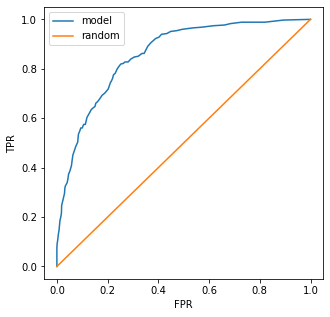

In [185]:
plt.figure(figsize=(5,5))

plt.plot(df_scores['FPR'], df_scores['TPR'], label = 'model')

plt.plot([0, 1],[0, 1], label = 'random')

#plt.plot(df_ideal['FPR'], df_ideal['TPR'], label = 'ideal')

plt.legend()

plt.xlabel('FPR')
plt.ylabel('TPR')

#Using scikt-learn library to plot our Roc curve

In [186]:
from sklearn.metrics import roc_curve

In [187]:
FPR, TPR, thresholds = roc_curve(y_val, y_pred)

Text(0, 0.5, 'TPR')

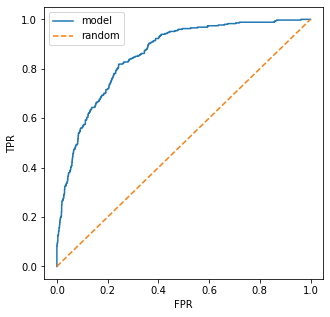

In [188]:
plt.figure(figsize=(5,5))

plt.plot(FPR, TPR, label = 'model')
plt.plot([0,1],[0,1], label = 'random', linestyle = '--')

plt.legend()

plt.xlabel('FPR')
plt.ylabel('TPR')

# 4.6- ROC AUC (area under curve)

#useful metric for evaluating classifcation model performance from 0 to 1. we want to be close to the ideal point with threshold = 1, TPR= 100 and FPR = 0. Area under our model curve evaluates  how good the model is

#The AUROC of a random model is 0.5, while for an ideal one is 1. In ther words, AUC can be interpreted as the probability that a randomly selected positive example has a greater score than a randomly selected negative example. Our model should have a curve btwn 0.5 & 1 because it's inbetween both random and ideal.

In [189]:
from sklearn.metrics import auc, roc_auc_score

In [190]:
auc(FPR, TPR), auc(df_scores['FPR'], df_scores['TPR']) #our FPR,TPR with that of scikitlearn(accurate cos of more threshold)

(0.8572386167896259, 0.8571411160583704)

In [191]:
FPR, TPR, thresholds = roc_curve(y_val, y_pred)
auc(FPR, TPR)                                      #another scikit-learn way to get roc_auc with 101 thresholds

0.8572386167896259

In [192]:
roc_auc_score(y_val, y_pred)                  #scikit learn way with more thresholds

0.8572386167896259

#to manually calcuate if a randomly selected positive example(churn) has higher scorethan a randomly selected negative example(no churn). this can be done with auc/roc_auc_score as above. 

#Area under curve = P(randomly selected positive > randomly selected negative) = auc(FPR, TPR)

In [193]:
#define both positive and negative examples.

neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [194]:
# select random positive and negative example

import random

In [195]:
pos_index = random.randint(0, len(pos) - 1)
neg_index = random.randint(0, len(neg) - 1)
pos_index, neg_index

(299, 315)

In [196]:
#compare the scores of the random positive example to the negative example

pos[pos_index] > neg[neg_index]

False

In [197]:
#combining all for experiment of n=100000 times and iterating.

n = 100000
success = 0 

for i in range(n):
    pos_index = random.randint(0, len(pos) - 1)
    neg_index = random.randint(0, len(neg) - 1)
    
    if pos[pos_index] > neg[neg_index]:
        success = success + 1
success / n    

0.85611

#the above success rate is close to auc/roc_auc_score, which tells us how well our model can order customers i.e anytime we select a customer who will churn and a customer who will not churn randomly, the churn customer will always have a higher score than the customer who will not churn.

In [198]:
#doing the above with numpy with n=10000 samples. n can be any number of samples

n = 10000
np.random.seed(1)
pos_index = np.random.randint(0, len(pos), size=n)
neg_index = np.random.randint(0, len(neg), size=n)

In [199]:
(pos[pos_index] > neg[neg_index]).mean()

0.8586

# 4.7- Cross Validation

#Evaluating the model on different subsets of data

#Getting the average predictions and the spread within predictions

#Parameter tuning is the selection of the best parameter. We split our dataset in train, val, and test. Put aside the test data, combine the train and val datasets and split into parts(folds) of K(K-folds). for examples k = 3parts. Train the first 2 parts with the model g(x) and validate with the part 3, and compute the AUC on the validation. Use 33% val data and 67% train data.

#Thereafter, train the model with parts 1 & 3 datasets and validate with part 2, record AUC. Lastly, train model with parts 2 & 3 and validate with part 1. record AUC afterwards. compute the mean and standard deviation of all AUCs and individual AUC of each fold(1,2,3). STD shows how stable the model is and how the scores differ across different folds

In [200]:
#create a function for train dataset and logistic regression model

def train(df_train, y_train):
    dicts = df_train[categorical_variables + numeral_variables].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    return dv, model

In [201]:
dv, model = train(df_train, y_train)

In [202]:
#create a function for prediction:

def predict(df, dv, model):
    dicts = df[categorical_variables + numeral_variables].to_dict(orient='records')
    
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:,1]
    
    return y_pred

In [203]:
y_pred = predict(df_val, dv, model)

In [204]:
#kfolds from model selection: split to 10, shuffle=True with random_state.

from sklearn.model_selection import KFold

In [205]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [206]:
#to get the train and val dataframes:

train_idx, val_idx = next(kfold.split(df_full_train))

In [207]:
len(train_idx), len(val_idx), len(df_full_train)      #val_idx is 1/10 of df_full_train

(5070, 564, 5634)

In [208]:
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]
df_train.T

,0,1,2,3,5,6,7,8,9,10,...,5622,5623,5624,5625,5627,5628,5630,5631,5632,5633
customerid,5442-pptjy,6261-rcvns,2176-osjuv,6161-erdgd,4765-oxppd,0742-lafqk,5213-twwju,9957-yodkz,1732-vhubq,7771-zonat,...,0827-itjph,6023-yebup,5345-bmkwb,1131-qqzeb,7446-sfaoa,2250-ivbwa,3507-gasnp,8868-wozgu,1251-krreg,5840-nvdcg
gender,male,female,male,male,female,male,male,male,female,male,...,male,male,male,male,female,male,male,male,male,female
seniorcitizen,0,0,0,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
partner,yes,no,yes,yes,yes,yes,no,yes,yes,no,...,no,no,yes,yes,yes,yes,no,no,no,yes
dependents,yes,no,no,yes,yes,no,no,no,yes,no,...,no,no,no,no,no,yes,yes,no,no,yes
tenure,12,42,71,71,9,72,28,6,47,22,...,36,3,8,71,37,64,60,28,2,16
phoneservice,yes,yes,yes,yes,yes,yes,yes,yes,yes,no,...,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes
multiplelines,no,no,yes,yes,no,yes,no,yes,no,no_phone_service,...,no,yes,no,yes,no,no,no,yes,yes,no
internetservice,no,dsl,dsl,dsl,dsl,fiber_optic,fiber_optic,fiber_optic,fiber_optic,dsl,...,no,fiber_optic,no,no,no,fiber_optic,no,fiber_optic,dsl,dsl
onlinesecurity,no_internet_service,yes,yes,yes,yes,yes,no,no,no,no,...,no_internet_service,no,no_internet_service,no_internet_service,no_internet_service,yes,no_internet_service,no,no,yes


#tqdm shows us to see progress of each iterations. in our case, the kfold split is 10

In [209]:
!pip install tqdm                  

In [210]:
from tqdm.auto import tqdm

In [211]:
#combining all functions above and the kfold.split() method into a loop

scores = []

for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    y_train = df_train['churn'].values
    y_val = df_val['churn'].values
    
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
    
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

0it [00:00, ?it/s]

C:\Users\emman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\emman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [212]:
scores                           #scores for folds 1-10(ten models)

[0.8479398247539081,
 0.8410581683168317,
 0.8557214756739697,
 0.8343263928894741,
 0.8265973945409429,
 0.8342657342657342,
 0.8412569195701727,
 0.8186669829222013,
 0.8455461686675559,
 0.8614332291351551]

In [213]:
np.mean(scores), np.std(scores)                #avg.score and std for all 10folds

(0.8406812290735945, 0.012240125901775431)

In [214]:
print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))       #another way yo round to 3.d.p. 84% mean and spread is 0.012

0.841 +- 0.012


In [227]:
#add a regularization parameter c to the logistic regression  

#create a function for train dataset and logistic regression model with C and max_iter 

def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical_variables + numeral_variables].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [228]:
dv, model = train(df_train, y_train, C=0.001)

In [229]:
#combining all functions above and the kfold.split() method into a loop

n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = df_train['churn'].values
        y_val = df_val['churn'].values
    
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
    
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        
    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores))) 

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.825 +- 0.009
C=0.01 0.840 +- 0.009
C=0.1 0.840 +- 0.008
C=0.5 0.841 +- 0.006
C=1 0.841 +- 0.009
C=5 0.841 +- 0.008
C=10 0.841 +- 0.008


In [230]:
dv, model = train(df_full_train, df_full_train['churn'].values, C=1.0)
y_pred = predict(df_test, dv, model)
    
auc = roc_auc_score(y_test, y_pred)
auc

0.8572386167896259

In [231]:
C = 1.0                         #we use the values to save our model below 
n_splits = 5

# 5.1: Model Deployment

#After training and evaluating the classification model, model deployment is done on a machine used as a server and creating some API endpoints for other machines to have access to the server to predict values. Deployment is done by:

#(1). Save the model in a file to be accessed by the churn(web) service of a company. (2). The marketing service requests from the churn service about a customer willing to churn and the churn service uses the saved model to predict if the customer will churn or not. If the customer is to churn, the marketing serice sends an email to the predicted churning customer

#Goal: Save and load the model from pickle, use FLASK (framework for creating webservices in python) to put the saved model in a webservice, use PIPENV TO create a virtual environment to isolate dependencies of the webservice from other services in our machine to avoid interference, use DOCKER to create system dependencies, then deploy the container on AWS cloud with ELASTIC BEANSTALK.

# Save the Model as a file with Pickle

In [232]:
import pickle

In [233]:
# save the model to a file:

output_file = f'model_C={C}.bin'
output_file

'model_C=1.0.bin'

In [234]:
# write to the file: wb means write binary(bytestream) alone to the file and dump in pickle. Close afterwards

f_out = open(output_file, 'wb')
pickle.dump((dv, model), f_out)
f_out.close()

In [235]:
# this method automatically open and close the file above. same as this below:

with open(output_file, 'wb') as f_out:
    pickle.dump((dv, model), f_out)

# Load the Model

In [1]:
# Restart the kernel and load

import pickle

In [2]:
model_file = 'model_C=1.0.bin'

In [3]:
f_in = open(model_file, 'rb')
dv, model = pickle.load(f_in)
f_in.close()
dv,model

(DictVectorizer(sparse=False), LogisticRegression(max_iter=1000))

In [4]:
with open(model_file, 'rb') as f_in:
    dv, model = pickle.load(f_in)

In [5]:
dv, model

(DictVectorizer(sparse=False), LogisticRegression(max_iter=1000))

In [25]:
customer = {
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'yes',
    'dependents': 'no',
    'phoneservice': 'no',
    'multiplelines': 'no_phone_service',
    'internetservice': 'dsl',
    'onlinesecurity': 'no',
    'onlinebackup': 'yes',
    'deviceprotection': 'no',
    'techsupport': 'no',
    'streamingtv': 'no',
    'streamingmovies': 'no',
    'contract': 'month-to-month',
    'paperlessbilling': 'yes',
    'paymentmethod': 'electronic_check',
    'tenure': 1,
    'monthlycharges': 29.85,
    'totalcharges': 29.85
    
}

In [26]:
X = dv.transform([customer])
X

array([[ 1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  1.  ,  0.  ,  0.  , 29.85,  0.  ,  1.  ,  0.  ,  0.  ,
         0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  , 29.85]])

In [27]:
model.predict_proba(X)[0,1]               # customer tenure of 1-month will likely churn bcos it's > 0.5 threshold

0.6363584152815248

#two instances (10months and 20months) below are for reference

In [14]:
model.predict_proba(X)[0,1]               #customer tenure of 10-months almost not churn bcos it's < 0.5 threshold

0.490496938018166

In [20]:
model.predict_proba(X)[0,1]              #customer tenure of 20-months will not churn bcos it's < 0.5 threshold

0.33136274884796113

In [ ]:
#Download this jupyter as python file and open